## Exercise
1. Based on above predict method calculate probability of the following 4 shapes:
```
"""@@@@@
   @...@
   @..@@
   @...@
   @@@@@""",
""".@@@@
   ....@
   @@.@@
   @....
   @@@@@""",
"""@.@.@
   @...@
   @@@@@
   ....@
   ....@""",
"""@@@@@
   @....
   @@.@@
   @...@
   @@@@@"""
```
2. Plot out the images above in black and white "pixels" like done previously

In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
raw_digits = [
    """@@@@@
       @...@
       @...@
       @...@
       @@@@@""",
    """..@..
       ..@..
       ..@..
       ..@..
       ..@..""",
    """@@@@@
       ....@
       @@@@@
       @....
       @@@@@""",
    """@@@@@
       ....@
       @@@@@
       ....@
       @@@@@""",
    """@...@
       @...@
       @@@@@
       ....@
       ....@""",
    """@@@@@
       @....
       @@@@@
       ....@
       @@@@@""",
    """@@@@@
       @....
       @@@@@
       @...@
       @@@@@""",
    """@@@@@
       ....@
       ....@
       ....@
       ....@""",
    """@@@@@
       @...@
       @@@@@
       @...@
       @@@@@""",
    """@@@@@
       @...@
       @@@@@
       ....@
       @@@@@"""]


def make_digit(raw_digit):
    """transform digit set to using zeros instead of dots"""
    return [1 if c == '@' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]


inputs = [make_digit(raw_digit) for raw_digit in raw_digits]
inputs


[[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [32]:
# create targets as one-hot encoded matrix of 10x10 (each vector has a single one digit at the proper index)
targets = [[1 if i == j else 0 for i in range(10)] for j in range(10)]
targets

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [33]:
# neural network math "primitives"

import math


def sigmoid(t):
    """a step function made continous in order to use calculus (differential)"""
    return 1 / (1 + math.exp(-t))  # t=0 -> 1/2, t=100 -> ~ 1, t=-100 -> ~0


def neuron_output(weights, inputs):
    """reduces all values from input array and weights array to a value between 0 to 1"""
    return sigmoid(dot(weights, inputs))


def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [34]:
def feed_forward(neural_network, input_vector):
    """takes in a neural network
    (represented as a list of lists(non-input layers) of lists(neurons) of weights)
    and returns the output from forward-propagating the input"""
    outputs = []
    # process one layer at a time
    for layer in neural_network:
        input_with_bias = input_vector + [1]  # add a bias input
        output = [neuron_output(neuron, input_with_bias)  # compute the output
                  for neuron in layer]  # for each neuron
        outputs.append(output)  # and remember it

        # then the input to the next layer is the output of this one
        input_vector = output
    return outputs

In [35]:
def backpropagate(network, input_vector, targets):
    """
    1. Run feed_forward on an input vector to produce the outputs of all the neurons
    in the network.
    2. This results in an error for each output neuron—the difference between its out‐
    put and its target.
    3. Compute the gradient of this error as a function of the neuron’s weights, and
    adjust its weights in the direction that most decreases the error.
    4. “Propagate” these output errors backward to infer errors for the hidden layer.
    5. Compute the gradients of these errors and adjust the hidden layer’s weights in the
    same manner.
    """
    # We assume a single hidden layer from the network given to feed_forward function
    hidden_outputs, outputs = feed_forward(network, input_vector)
    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target)
                     for output, target in zip(outputs, targets)]
    # adjust weights for output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
        # focus on the ith output layer neuron
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjust the jth weight based on both
            # this neuron's delta and its jth input
            output_neuron[j] -= output_deltas[i] * hidden_output
    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                     dot(output_deltas, [n[i] for n in output_layer])
                     for i, hidden_output in enumerate(hidden_outputs)]
    # adjust weights for hidden layer, one neuron at a time
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input


In [36]:
def predict(in_put):
    return feed_forward(network, in_put)[-1]

In [40]:
import random
from tqdm import tqdm

random.seed(0)  # to get repeatable results
input_size = 25  # each input is a vector of length 25 (5x5 "pixels")

num_hidden = 5  # we'll have 5 neurons in the hidden layer
output_size = 10  # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for _ in range(input_size + 1)]
                for _ in range(num_hidden)]
#print(hidden_layer)

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for _ in range(num_hidden + 1)]
                for _ in range(output_size)]
#print(output_layer)

# the network starts out with random weights, one hidden layer and one output layer
network = [hidden_layer, output_layer]

print('Training the network...')

# 10,000 iterations seems enough to converge
for _ in tqdm(range(10000)):
    for input_vector, target_vector in zip(inputs,
                                           targets):  # inputs is a matrix of 10x25 (ten digits by 25 pixels), target is a one-hot encoded matrix of 10x10 (10 digits by 10 indices where each row has only 1 one and 9 zeroes)
        backpropagate(network, input_vector, target_vector)

Training the network...


100%|██████████| 10000/10000 [00:03<00:00, 2599.35it/s]


In [41]:
import numpy as np

print(np.array(inputs, dtype=np.int8))
#np.savetxt?
np.savetxt('./simple_digit_trainingset.csv', np.array(inputs, dtype=np.int8), delimiter=',', fmt='%d')

[[1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1]
 [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]]


<module 'matplotlib.pyplot' from '/Users/frederik/dev/docker_notebooks/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

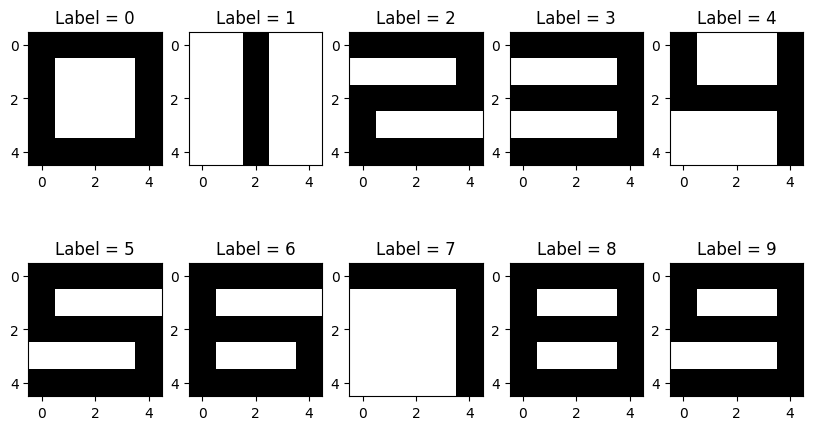

In [44]:
% matplotlib inline


import csv
import numpy as np
import matplotlib.pyplot as plt

filename = './simple_digit_trainingset.csv'


def read_data(filename):
    data = []
    with open(filename) as f:
        reader = csv.reader(f)
        for row in reader:
            label = reader.line_num - 1
            image = np.array(row[:], dtype=np.int8)
            data.append((label, image))
    return data


def generate_plot(data):
    count = 0
    f = plt.figure(figsize=(10, 5))
    for idx, row in enumerate(data):
        imarray = row[1].reshape((5, 5))
        plt.subplot(2, 5, idx + 1)
        plt.subplots_adjust(hspace=0.5)
        count += 1
        plt.title('Label = {}'.format(row[0]))
        plt.imshow(imarray, cmap='Greys', interpolation='None')
    return plt


generate_plot(read_data(filename))

[[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], [0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]]


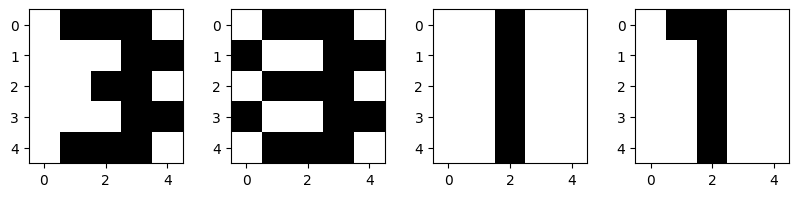

In [45]:
def plot_testset(data):
    count = 0
    f = plt.figure(figsize=(10, 5))
    data = np.array(data)
    for idx, row in enumerate(data):
        imarray = row.reshape((5, 5))
        plt.subplot(2, len(data), idx + 1)
        plt.subplots_adjust(hspace=0.5)
        count += 1
        plt.imshow(imarray, cmap='Greys', interpolation='None')
    return plt


test_set = [[0, 1, 1, 1, 0,
             0, 0, 0, 1, 1,
             0, 0, 1, 1, 0,
             0, 0, 0, 1, 1,
             0, 1, 1, 1, 0],
            [0, 1, 1, 1, 0,
             1, 0, 0, 1, 1,
             0, 1, 1, 1, 0,
             1, 0, 0, 1, 1,
             0, 1, 1, 1, 0],
            [0, 0, 1, 0, 0,
             0, 0, 1, 0, 0,
             0, 0, 1, 0, 0,
             0, 0, 1, 0, 0,
             0, 0, 1, 0, 0],
            [0, 1, 1, 0, 0,
             0, 0, 1, 0, 0,
             0, 0, 1, 0, 0,
             0, 0, 1, 0, 0,
             0, 0, 1, 0, 0]]
print(test_set)
plt.show(plot_testset(test_set))

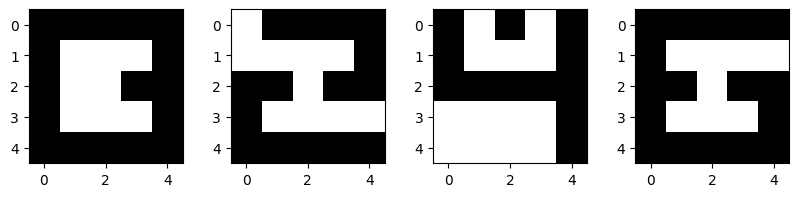

In [54]:
exercise_set = [
    """@@@@@
       @...@
       @..@@
       @...@
       @@@@@""",
    """.@@@@
       ....@
       @@.@@
       @....
       @@@@@""",
    """@.@.@
       @...@
       @@@@@
       ....@
       ....@""",
    """@@@@@
       @....
       @@.@@
       @...@
       @@@@@"""
]
exercise_inputs = [make_digit(exercise_input) for exercise_input in exercise_set]

plt.show(plot_testset(exercise_inputs))

In [61]:
for i in exercise_inputs:
    result = predict(i)
    result = np.array(result)
    print(f"Prediction: {np.argmax(result)} \n results: {result}")

Prediction: 0 
 results: [9.79431736e-01 2.30954145e-18 4.71614890e-13 5.10959354e-10
 1.77133817e-07 7.50789636e-05 1.29196111e-02 7.48696263e-03
 4.35141276e-02 2.29516710e-07]
Prediction: 5 
 results: [5.78985619e-10 1.21562826e-08 2.68339444e-01 3.47355431e-09
 3.69649285e-06 9.09298080e-01 2.50389083e-03 2.73869363e-09
 9.44395184e-04 3.21480239e-07]
Prediction: 4 
 results: [1.26005715e-06 5.31917750e-04 3.95783355e-06 9.18780285e-06
 6.32719047e-01 4.12701112e-09 1.22986394e-05 5.57551903e-02
 7.65555646e-14 4.08178639e-14]
Prediction: 0 
 results: [7.43119462e-01 2.42729424e-17 6.48007979e-11 4.81093222e-11
 1.77559706e-06 2.15784623e-04 7.39177013e-02 8.46570201e-04
 3.54319994e-03 2.82437020e-09]
